In [29]:
from stochman.curves import CubicSpline
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# constants 
N = 5 # number of nodes for cubic spline approx

In [31]:
# generate points that roughly follow sin curve between 0 and 2pi
t = torch.linspace(0, 1, N)
x = (t*torch.pi/2).view(1, N, 1).repeat(2, 1, 1)
y = torch.sin(x)+ torch.normal(0, 0.1, [2, N, 1]) # add noise

tensor([[0.0000, 0.0398],
        [0.0000, 0.2426]])
tensor([[1.5708, 1.0503],
        [1.5708, 1.0140]])
tensor([[[2.0249e-08, 3.9828e-02],
         [1.5708e+00, 1.0503e+00]],

        [[2.0249e-08, 2.4260e-01],
         [1.5708e+00, 1.0140e+00]]], grad_fn=<SumBackward1>)


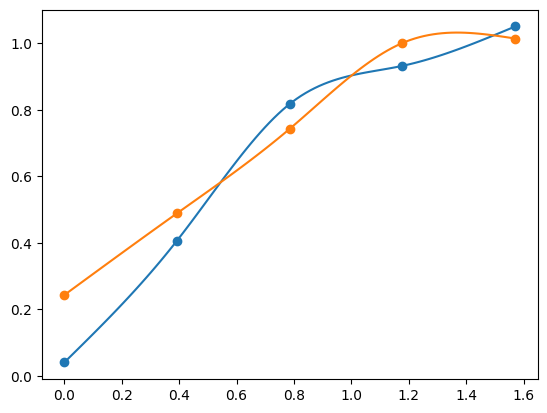

In [32]:
# plot samples
fig, axis = plt.subplots(1, 1)
axis.scatter(x[0, :, 0],y[0, :, 0])
axis.scatter(x[1, :, 0],y[1, :, 0])

pts = torch.cat((x, y), dim=2)
begin = pts[:, 0, :]
end = pts[:, -1, :]
print(begin)
print(end)

# fit cubic spline 
cubic_spline = CubicSpline(begin=begin, end=end, num_nodes=N)
print(cubic_spline(torch.tensor([0.0, 1.0])))
cubic_spline.fit(t, pts)
cubic_spline.plot(ax=axis)
plt.show()